### Standard workflow
The next couple of cells show the standard approach to:
- Loading datasets
- Defining and training a model
- Visualising the results

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

import deepSI_lite as dsi
torch.manual_seed(0)

c:\Users\20174290\AppData\Local\miniconda3\envs\portHamiltonian\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\20174290\AppData\Local\Temp\ipykernel_7336\1684461388.py:1: SyntaxWarning: invalid escape sequence '\T'
  datasets = torch.load("datasets\\\TEST_DATASET_GENERATED.pt")
C:\Users\20174290\AppData\Local\Temp\ipykernel_7336\1684461388.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe

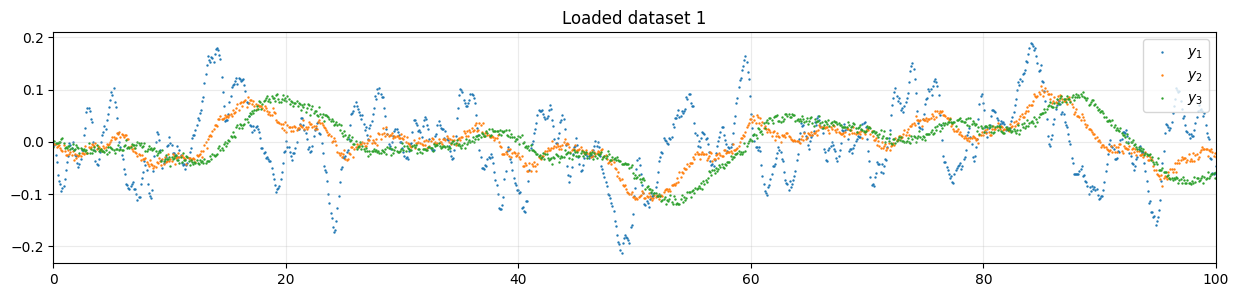

In [2]:
datasets = torch.load("datasets\\\TEST_DATASET_GENERATED.pt")
sim_time = torch.linspace(0, 100, 1024)

z = 1
fig = plt.figure(figsize=(15, 3))
plt.scatter(sim_time, datasets[z]["noisy_output"][:, 0], s=0.5)
plt.scatter(sim_time, datasets[z]["noisy_output"][:, 1], s=0.5)
plt.scatter(sim_time, datasets[z]["noisy_output"][:, 2], s=0.5)
plt.legend(["$y_{1}$", "$y_{2}$", "$y_{3}$"], loc=1)
plt.title(f"Loaded dataset {z}")
plt.xlim([0, sim_time[-1]])
plt.grid(alpha=0.25)
plt.show()

In [3]:
# Divide the datasets across training, validation and testing datasets
# The resulting objects are lists of deepSI_lite.Input_output_data objects
n_train = 5
n_val = 2
n_test = 1

dsi_train = []
dsi_val = []
dsi_test = []

for i, set in enumerate(datasets):
    if i < n_train:
        dsi_train.append(set["dsi_IO"])
    elif i < n_train+n_val:
        dsi_val.append(set["dsi_IO"])
    else:
        dsi_test.append(set["dsi_IO"])

In [ ]:
# Define and train the model
nx, nb, na = 6, 10, 10
nu, ny, norm = dsi.get_nu_ny_and_auto_norm(dsi_train)
print(nu, ny)

model = dsi.models.pHNN_SUBNET(nu, ny, dsi.Norm(0,1,0,1), nx=nx, nb=nb, na=na, tau=1)


fit_result = dsi.fit(model, train=dsi_train, val=dsi_val, n_its=1001, T=30, batch_size=64, val_freq=100)

3 3
Number of samples to train on = 4925


  0%|          | 0/1001 [00:00<?, ?it/s]

it       0 NRMS loss nan NRMS val 0.60705!! nan samps/sec


Sqrt loss: 0.01892:  10%|▉         | 100/1001 [00:55<08:11,  1.83it/s]

it     100 NRMS loss 0.03392 NRMS val 0.06022!! 121.47 samps/sec


Sqrt loss: 0.01579:  20%|█▉        | 200/1001 [01:48<06:26,  2.07it/s]

it     200 NRMS loss 0.01621 NRMS val 0.05250!! 125.81 samps/sec


Sqrt loss: 0.01400:  30%|██▉       | 300/1001 [02:40<05:47,  2.02it/s]

it     300 NRMS loss 0.01393 NRMS val 0.06147   127.38 samps/sec


Sqrt loss: 0.01098:  40%|███▉      | 400/1001 [03:34<04:41,  2.13it/s]

it     400 NRMS loss 0.01188 NRMS val 0.08794   127.47 samps/sec


Sqrt loss: 0.00912:  50%|████▉     | 500/1001 [04:27<04:01,  2.07it/s]

it     500 NRMS loss 0.01030 NRMS val 0.73168   127.37 samps/sec


Sqrt loss: 0.00900:  60%|█████▉    | 600/1001 [05:22<03:39,  1.83it/s]

it     600 NRMS loss 0.01008 NRMS val 1.46052   126.78 samps/sec


Sqrt loss: 0.00846:  70%|██████▉   | 700/1001 [06:17<02:28,  2.03it/s]

it     700 NRMS loss 0.00907 NRMS val 1.42691   126.50 samps/sec


Sqrt loss: 0.00933:  80%|███████▉  | 800/1001 [07:12<01:43,  1.93it/s]

it     800 NRMS loss 0.00888 NRMS val 1.32591   126.23 samps/sec


Sqrt loss: 0.00803:  90%|████████▉ | 900/1001 [08:05<00:50,  1.99it/s]

it     900 NRMS loss 0.00882 NRMS val 1.23084   126.37 samps/sec


Sqrt loss: 0.00856: 100%|█████████▉| 1000/1001 [09:00<00:00,  1.94it/s]

it   1,000 NRMS loss 0.00886 NRMS val 1.20363   126.04 samps/sec


Sqrt loss: 0.00815: 100%|██████████| 1001/1001 [09:04<00:00,  1.84it/s]


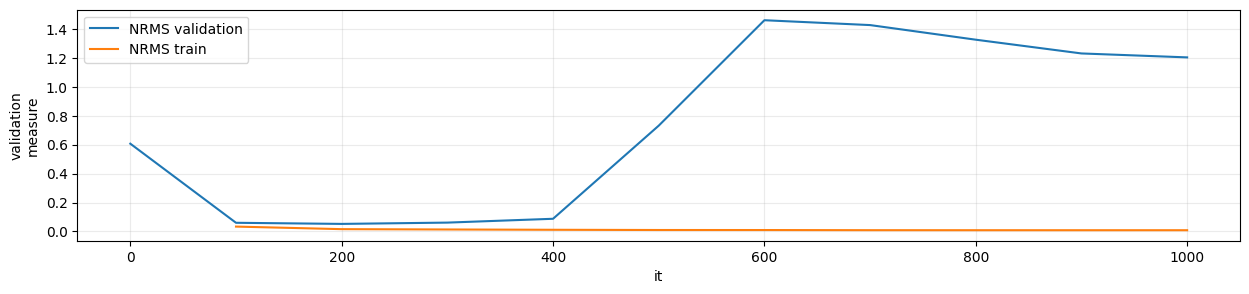

In [5]:
# Plot training progression
plt.figure(figsize=(15, 3))
plt.plot(fit_result['it_counter'], fit_result['NRMS_val'])
plt.plot(fit_result['it_counter'], fit_result['NRMS_train'])
plt.legend(['NRMS validation', 'NRMS train'])
plt.xlabel('it'); plt.ylabel('validation\nmeasure')
plt.grid(alpha=0.25)
plt.show()

In [ ]:
# Plot the qualitative results of the trained model
fig = plt.figure(figsize=(15, 3))
plt.plot(dsi_test[0].y)                 # True system
plt.plot(model.simulate(dsi_test[0]).y) # Model simulation
plt.legend(["$y_{1}$", "$y_{2}$", "$y_{3}$", "$\hat{y}_{1}$", "$\hat{y}_{2}$", "$\hat{y}_{3}$"], loc=1)
plt.xlim([0, len(sim_time)])
plt.grid(alpha=0.25)
plt.show()

### Custom workflow
The following cells adapt the model and training process to include prior knowledge to (hopefully) improve the model.

In [4]:
# It is possible to provide the model with known dynamics if those are available
from utils import DK_matrix_form
M_vals = torch.FloatTensor([2, 2, 2])
D_vals = torch.FloatTensor([0.5, 0.5, 0.5])
K_vals = torch.FloatTensor([1, 1, 1])

M = torch.diag(M_vals)
D = DK_matrix_form(D_vals)
K = DK_matrix_form(K_vals)

x_test = torch.FloatTensor([[1, 1, 1, -2, -2, -2]])
x_test = torch.rand(2, 6)

def true_J(x):
    dim = int(nx/2)
    J = torch.zeros(nx, nx)
    J[:dim, dim:] = torch.eye(dim)
    J[dim:, :dim] = -torch.eye(dim)
    J = J.expand(x.shape[0], nx, nx)
    return J

def true_R(x):
    dim = int(nx/2)
    R = torch.zeros(nx, nx)
    R[dim:, dim:] = D
    R = R.expand(x.shape[0], nx, nx)
    return R

def true_G(x):
    G = torch.cat((torch.zeros(nu, nu), torch.eye(nu)), dim=0)
    G = G.expand(x.shape[0], nx, nu)
    return G

def true_H(x):
    dim = int(nx/2)
    # Position dependent part of the Hamiltonian:
    q = x[:, :dim]
    Kq = torch.einsum("ij, bj -> bi", K, q)     # First take Kq = K*q
    Hq = 0.5*torch.einsum("bj, bi -> b", q, Kq) # Then take Hp = 0.5q*Kq

    # Momentum dependent part of the Hamiltonian:
    p = x[:, dim:]
    Mp = torch.einsum("ij, bj -> bi", torch.inverse(M), p)      # First take Mp = M^-1*p
    Hp = 0.5*torch.einsum("bj, bi -> b", p, Mp)                 # Then take Hp = 0.5p*Mp

    return Hq+Hp

print(true_J(x_test))
print(true_R(x_test))
print(true_G(x_test))
print(true_H(x_test))

NameError: name 'nx' is not defined

In [ ]:
# Defining a new model with known dynamics:
new_model = dsi.models.pHNN_SUBNET(nu, ny, norm=dsi.Norm(0,1,0,1), nx=nx, nb=nb, na=na, tau=1,
                                   Jnet=true_J,
                                   Rnet=true_R,
                                   Gnet=true_G)

In [26]:
# Training a mdel with changing window lengths:
window_sizes = [25, 50, 100, 200]
fit_list = []
for window in window_sizes:
    fit = dsi.fit(new_model, train=dsi_train, val=dsi_val, n_its=1001, T=window, batch_size=64, val_freq=100)
    fit_list.append(fit)


Number of samples to train on = 4950


Sqrt loss: 0.02950:   0%|          | 1/1001 [00:02<41:48,  2.51s/it]

it       0 NRMS loss nan NRMS val 0.04302!! nan samps/sec


Sqrt loss: 0.01850:  10%|█         | 101/1001 [00:23<14:00,  1.07it/s]

it     100 NRMS loss 0.02552 NRMS val 0.03964!! 342.73 samps/sec


Sqrt loss: 0.01574:  20%|██        | 201/1001 [00:44<11:52,  1.12it/s]

it     200 NRMS loss 0.01647 NRMS val 0.03778!! 344.46 samps/sec


Sqrt loss: 0.01355:  30%|███       | 301/1001 [01:04<10:50,  1.08it/s]

it     300 NRMS loss 0.01445 NRMS val 0.03692!! 352.57 samps/sec


Sqrt loss: 0.01238:  40%|████      | 401/1001 [01:27<08:53,  1.12it/s]

it     400 NRMS loss 0.01279 NRMS val 0.03699   343.76 samps/sec


Sqrt loss: 0.01105:  50%|█████     | 501/1001 [01:46<06:52,  1.21it/s]

it     500 NRMS loss 0.01188 NRMS val 0.03690!! 347.59 samps/sec


Sqrt loss: 0.01135:  60%|██████    | 601/1001 [02:06<05:28,  1.22it/s]

it     600 NRMS loss 0.01112 NRMS val 0.03624!! 350.66 samps/sec


Sqrt loss: 0.00941:  70%|███████   | 701/1001 [02:25<04:07,  1.21it/s]

it     700 NRMS loss 0.01074 NRMS val 0.03514!! 353.86 samps/sec


Sqrt loss: 0.01104:  80%|████████  | 801/1001 [02:46<02:46,  1.20it/s]

it     800 NRMS loss 0.01047 NRMS val 0.03412!! 354.94 samps/sec


Sqrt loss: 0.01072:  90%|█████████ | 901/1001 [03:06<01:25,  1.17it/s]

it     900 NRMS loss 0.01043 NRMS val 0.03321!! 355.76 samps/sec


Sqrt loss: 0.00938: 100%|██████████| 1001/1001 [03:25<00:00,  4.87it/s]

it   1,000 NRMS loss 0.01018 NRMS val 0.03288!! 357.26 samps/sec


Number of samples to train on = 4825


  0%|          | 0/1001 [00:00<?, ?it/s]

it       0 NRMS loss nan NRMS val 0.03288!! nan samps/sec


Sqrt loss: 0.01527:  10%|▉         | 100/1001 [00:36<05:01,  2.98it/s]

it     100 NRMS loss 0.02057 NRMS val 0.02552!! 186.75 samps/sec


Sqrt loss: 0.01278:  20%|█▉        | 200/1001 [01:13<04:56,  2.70it/s]

it     200 NRMS loss 0.01394 NRMS val 0.02238!! 186.11 samps/sec


Sqrt loss: 0.01372:  30%|██▉       | 300/1001 [01:50<03:53,  3.00it/s]

it     300 NRMS loss 0.01306 NRMS val 0.01988!! 185.88 samps/sec


Sqrt loss: 0.01248:  40%|███▉      | 400/1001 [02:34<05:03,  1.98it/s]

it     400 NRMS loss 0.01243 NRMS val 0.01906!! 176.09 samps/sec


Sqrt loss: 0.01147:  50%|████▉     | 500/1001 [03:22<03:20,  2.50it/s]

it     500 NRMS loss 0.01184 NRMS val 0.02354   168.05 samps/sec


Sqrt loss: 0.01231:  60%|█████▉    | 600/1001 [03:59<02:14,  2.98it/s]

it     600 NRMS loss 0.01138 NRMS val 0.02889   171.06 samps/sec


Sqrt loss: 0.01037:  70%|██████▉   | 700/1001 [04:35<01:44,  2.87it/s]

it     700 NRMS loss 0.01103 NRMS val 0.03814   173.38 samps/sec


Sqrt loss: 0.01154:  80%|███████▉  | 800/1001 [05:10<01:09,  2.89it/s]

it     800 NRMS loss 0.01074 NRMS val 0.04031   175.71 samps/sec


Sqrt loss: 0.01215:  90%|████████▉ | 900/1001 [05:48<00:32,  3.08it/s]

it     900 NRMS loss 0.01049 NRMS val 0.04041   175.97 samps/sec


Sqrt loss: 0.01008: 100%|█████████▉| 1000/1001 [06:24<00:00,  3.14it/s]

it   1,000 NRMS loss 0.01058 NRMS val 0.03922   177.54 samps/sec


Sqrt loss: 0.01016: 100%|██████████| 1001/1001 [06:26<00:00,  2.59it/s]


Number of samples to train on = 4575


  0%|          | 0/1001 [00:00<?, ?it/s]

it       0 NRMS loss nan NRMS val 0.01906!! nan samps/sec


Sqrt loss: 0.01490:  10%|▉         | 100/1001 [01:09<11:21,  1.32it/s]

it     100 NRMS loss 0.01994 NRMS val 0.01362!! 94.55 samps/sec


Sqrt loss: 0.01297:  20%|█▉        | 200/1001 [02:20<08:45,  1.52it/s]

it     200 NRMS loss 0.01440 NRMS val 0.01226!! 94.04 samps/sec


Sqrt loss: 0.01144:  30%|██▉       | 300/1001 [03:32<07:28,  1.56it/s]

it     300 NRMS loss 0.01299 NRMS val 0.01059!! 93.44 samps/sec


Sqrt loss: 0.01159:  40%|███▉      | 400/1001 [04:41<06:50,  1.46it/s]

it     400 NRMS loss 0.01244 NRMS val 0.00991!! 94.15 samps/sec


Sqrt loss: 0.01171:  50%|████▉     | 500/1001 [05:53<05:37,  1.48it/s]

it     500 NRMS loss 0.01241 NRMS val 0.01014   93.60 samps/sec


Sqrt loss: 0.01167:  60%|█████▉    | 600/1001 [07:03<05:00,  1.33it/s]

it     600 NRMS loss 0.01226 NRMS val 0.01036   93.73 samps/sec


Sqrt loss: 0.01142:  70%|██████▉   | 700/1001 [08:17<03:19,  1.51it/s]

it     700 NRMS loss 0.01226 NRMS val 0.01023   93.14 samps/sec


Sqrt loss: 0.01287:  80%|███████▉  | 800/1001 [09:28<02:29,  1.34it/s]

it     800 NRMS loss 0.01218 NRMS val 0.00944!! 93.11 samps/sec


Sqrt loss: 0.01175:  90%|████████▉ | 900/1001 [10:38<01:08,  1.48it/s]

it     900 NRMS loss 0.01217 NRMS val 0.00927!! 93.41 samps/sec


Sqrt loss: 0.01535: 100%|█████████▉| 1000/1001 [11:49<00:00,  1.49it/s]

it   1,000 NRMS loss 0.01225 NRMS val 0.00907!! 93.41 samps/sec


Sqrt loss: 0.01164: 100%|██████████| 1001/1001 [11:52<00:00,  1.40it/s]


Number of samples to train on = 4075


  0%|          | 0/1001 [00:00<?, ?it/s]

it       0 NRMS loss nan NRMS val 0.00907!! nan samps/sec


Sqrt loss: 0.01117:  10%|▉         | 100/1001 [02:17<20:08,  1.34s/it]

it     100 NRMS loss 0.01469 NRMS val 0.00880!! 47.25 samps/sec


Sqrt loss: 0.01109:  20%|█▉        | 200/1001 [04:36<18:39,  1.40s/it]

it     200 NRMS loss 0.01119 NRMS val 0.00828!! 47.16 samps/sec


Sqrt loss: 0.01123:  30%|██▉       | 300/1001 [06:58<16:23,  1.40s/it]

it     300 NRMS loss 0.01107 NRMS val 0.00813!! 46.68 samps/sec


Sqrt loss: 0.01025:  40%|███▉      | 400/1001 [09:17<13:19,  1.33s/it]

it     400 NRMS loss 0.01103 NRMS val 0.00783!! 46.73 samps/sec


Sqrt loss: 0.01068:  50%|████▉     | 500/1001 [11:35<11:26,  1.37s/it]

it     500 NRMS loss 0.01069 NRMS val 0.00789   46.77 samps/sec


Sqrt loss: 0.01098:  60%|█████▉    | 600/1001 [13:54<08:58,  1.34s/it]

it     600 NRMS loss 0.01073 NRMS val 0.00798   46.78 samps/sec


Sqrt loss: 0.00975:  70%|██████▉   | 700/1001 [16:35<07:43,  1.54s/it]

it     700 NRMS loss 0.01057 NRMS val 0.00733!! 45.75 samps/sec


Sqrt loss: 0.00914:  80%|███████▉  | 800/1001 [19:23<05:28,  1.64s/it]

it     800 NRMS loss 0.01058 NRMS val 0.00725!! 44.75 samps/sec


Sqrt loss: 0.01024:  90%|████████▉ | 900/1001 [22:18<02:57,  1.76s/it]

it     900 NRMS loss 0.01039 NRMS val 0.00730   43.75 samps/sec


Sqrt loss: 0.01147: 100%|█████████▉| 1000/1001 [25:06<00:01,  1.61s/it]

it   1,000 NRMS loss 0.01029 NRMS val 0.00655!! 43.18 samps/sec


Sqrt loss: 0.00936: 100%|██████████| 1001/1001 [25:10<00:00,  1.51s/it]


In [ ]:
# Concatenating the results:
last = 0
it_counter = [fit_list[0]["it_counter"][0]]
NRMS_train = [fit_list[0]["NRMS_train"][0]]
NRMS_val = [fit_list[0]["NRMS_val"][0]]

for i, fit in enumerate(fit_list):
    it = last + fit["it_counter"][1:]
    last = it[-1]
    it_counter = np.concat((it_counter, it))
    NRMS_train = np.concat((NRMS_train, fit["NRMS_train"][1:]))
    NRMS_val = np.concat((NRMS_val, fit["NRMS_val"][1:]))

# Combine into a single training dictionary, similar to the dsi.fit function output
fit_dict = {
    "it_counter":it_counter,
    "NRMS_train":NRMS_train,
    "NRMS_val":NRMS_val
}

[0.02551657 0.01646627 0.01445255 0.01279183 0.01187509 0.01112205
 0.0107424  0.01046788 0.01043361 0.01018281 0.02057353 0.0139367
 0.0130608  0.0124254  0.01184213 0.01137858 0.01103488 0.01073946
 0.01049236 0.01058167 0.01993739 0.01440047 0.01299098 0.01244376
 0.01240767 0.01226448 0.0122564  0.01217798 0.01217255 0.01224903
 0.01468625 0.01118628 0.01107144 0.01103413 0.01069215 0.01072662
 0.01056733 0.01058388 0.01039383 0.01028961]
{'a': 1}


In [ ]:
# Plot training progression
plt.figure(figsize=(15, 3))
plt.plot(fit_dict["it_counter"], fit_dict["NRMS_train"])
plt.plot(fit_dict["it_counter"], fit_dict["NRMS_val"])
plt.legend(['NRMS train', 'NRMS validation'])
plt.xlabel('it'); plt.ylabel('validation\nmeasure')
plt.xlim([0, it_counter[-1]])
plt.grid(alpha=0.25)
plt.show()

torch.Size([1, 10, 3])

In [ ]:
# Plot the qualitative results of the trained model
fig = plt.figure(figsize=(15, 3))
plt.plot(dsi_test[0].y)                     # True system
plt.plot(new_model.simulate(dsi_test[0]).y) # Model simulation
plt.legend(["$y_{1}$", "$y_{2}$", "$y_{3}$", "$\hat{y}_{1}$", "$\hat{y}_{2}$", "$\hat{y}_{3}$"], loc=1)
plt.xlim([0, len(sim_time)])
plt.grid(alpha=0.25)
plt.show()

RuntimeError: The size of tensor a (6) must match the size of tensor b (3) at non-singleton dimension 3